In [1]:
import numpy as np
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import StreamPowerEroder, LinearDiffuser, FlowAccumulator
from landlab import imshow_grid
from matplotlib import pyplot as plt
from landlab.components import NormalFault

In [2]:
number_of_rows = 200            # number of grid rows
number_of_columns = 200         # number of grid columns
dxy = 100                       # cell dimensions (same in x and y direction, i.e. square cells)

In [3]:
mg = RasterModelGrid((number_of_rows, number_of_columns), dxy)  # initialize the grid
np.random.seed(0)                                               # set seed to zero so that the results are reproducible
mg_noise = np.random.rand(mg.number_of_nodes)/1000.             # create topographic noise
zr = mg.add_zeros('node', 'topographic__elevation')             # create topographic elevation grid
zr += mg_noise                                                  # add the topographic noise

In [4]:
East = 4            # Conditions at the eastern, northern, western, and southern boundaries (1 = open, 4 = closed)
North = 4           #
West = 4            #
South = 1           #

In [5]:
mg.set_status_at_node_on_edges(right=East, top=North, left=West, bottom=South)    # set the boundary node status

In [6]:
U = 1E-3                     # Background uplift rate
fault_location = 10000       # Fault distance from the southern border
throw_rate = 1E-3            # Fault slip rate
fault_dip_angle = 60         # Fault dip angle

In [7]:
uplift_rate = np.ones(mg.number_of_nodes)*U        # initialize uplift field

In [8]:
## One-time uplift event
#fault_location = 10000  # (m)
#uplift_amount = 100 # (m) 
#zr[np.where(mg.node_y>fault_location)] += uplift_amount 

## Uplift Gradient
#low_uplift_rate = 1E-3 # (m/yr)
#high_uplift_rate = 2E-3 # (m/yr)
#uplift_rate_gradient = (high_uplift_rate - low_uplift_rate)/(number_of_rows-3)
#uplift_rate = low_uplift_rate + ((mg.node_y / dxy)-1) * uplift_rate_gradient

In [9]:
dt = 1000            # time step (yr)
tmax = 1E5           # time for the model loop to run (yr)

In [10]:
total_time = 0               # this will track the elapsed time within the time loop
t = np.arange(0, tmax, dt)   # array of individual time steps for the time loop

In [11]:
min_drainage_area = 1000    # threshold drainage area to initiate channel formation
K_hs = 1E-3                 # hillslope diffusivity
K_sp = 1E-4                 # htream power erodibility
m_sp = 0.5                  # exponent on drainage area in stream power equation 
n_sp = 1                    # exponent on slope in stream power equation
Plot_interval = 10000       # how often a figure is generated (yrs)

In [12]:
frr = FlowAccumulator(mg)                                                           # initialize flow accumulator                            
spr = StreamPowerEroder(mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0.0)      # intialize stream power eroder
dfn = LinearDiffuser(mg, linear_diffusivity=K_hs, deposit = False)                  # initialize linear diffuser
nf = NormalFault(mg, faulted_surface='topographic__elevation', fault_throw_rate_through_time={'time': [0], 'rate': [throw_rate]}, fault_dip_angle=fault_dip_angle, fault_trace={'x1': number_of_columns/2, 'y1': fault_location, 'x2': number_of_columns-1, 'y2': fault_location})   # initialize normal fault component

In [13]:
Plot_Ticker = 0
for ti in t:
    zr[mg.core_nodes] += uplift_rate[mg.core_nodes]*dt  # uplift the landscape
    nf.run_one_step(dt)                                 # translate the fault
    dfn.run_one_step(dt)                                # diffuse the landscape
    frr.run_one_step()                                  # route flow
    spr.run_one_step(dt)                                # fluvial incision
    total_time += dt                                    # advance time
    print(total_time)                                   # print current time
    Plot_Ticker += dt                                   # advance plot tracker
    if Plot_Ticker == Plot_interval:                    # plot DEM
        plt.ioff()
        fig = plt.figure(1)          
        imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'), cmap='terrain', allow_colorbar=True) 
        title_text = '$Year$='+str(total_time) 
        plt.title(title_text)
        plt.tight_layout()
        fig.savefig('/Users/Chris/Desktop/Tectonics-master/DEM/'+str(total_time)+'.pdf',  format='pdf', dpi=300) # IMPORTANT! --> Change the path so that it directs to the "Tectonics-Master" folder on your own machine!
        plt.close(fig)
        Plot_Ticker = 0

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000


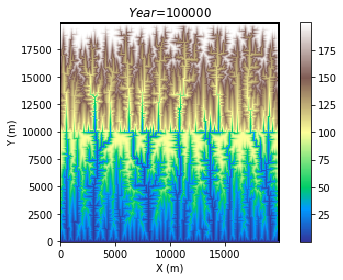

Final Terrain


In [14]:
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'), cmap='terrain', allow_colorbar=True)
title_text = '$Year$='+str(total_time)  
plt.title(title_text)
plt.tight_layout()
plt.show()
print('Final Terrain')